In [1]:
import pandas as pd 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
printscoreone=0
printscoretwo=0

In [3]:
df = pd.read_csv('D:\\Cloud Counselage\\Data.csv')
df.head()

,Name,Domain,Event1,Event2
0,Bryan Brock,Management,Jobs,Hackathons
1,Joseph Sullivan,Coding,Certifications,Webinars
2,Sherri Dawson,Security,Internships,Fests
3,Dustin Ferguson,Hardware,Competitions,Webinars
4,Kayla Young,Web Development,Expos,Certifications


In [4]:
df.Domain.unique()

array(['Management', 'Coding', 'Security', 'Hardware', 'Web Development',
       'Higher Education', 'IoT', 'Java', 'Artificial Intelligence',
       'Python', 'Finance', 'Mobile Applications', 'C++',
       'Software Architecture', 'Other', 'C', 'Cloud Computing',
       'Networking', 'JavaScript', 'Machine Learning', 'Blockchain',
       'Development Processes', 'Data Science'], dtype=object)

In [5]:
df.Event1.unique()

array(['Jobs', 'Certifications', 'Internships', 'Competitions', 'Expos',
       'Workshops', 'Trainings', 'Seminars', 'Hackathons', 'Fests',
       'Talks', 'Webinars', 'Courses'], dtype=object)

In [6]:
dmUQ = df.Domain.unique()
dmNO=[]
for x in range(1,len(dmUQ)+1):
    dmNO.append(x)

eeUQ = df.Event1.unique()
eeNO=[]
for x in range(1,len(eeUQ)+1):
    eeNO.append(x)
    
pUQ = df.Name.unique()
pNO=[]
for x in range(1,len(pUQ)+1):
    pNO.append(x)
               
df['Event1'].replace(eeUQ,eeNO,inplace=True)
df['Event2'].replace(eeUQ,eeNO,inplace=True)
df['Domain'].replace(dmUQ,dmNO,inplace=True)
df['Name'].replace(pUQ,pNO,inplace=True)
    
tmp_df=df.copy()
df.head()


,Name,Domain,Event1,Event2
0,1,1,1,9
1,2,2,2,12
2,3,3,3,10
3,4,4,4,12
4,5,5,5,2


In [7]:
Domain_extract={
    'MANAGEMENT':'Management',                                       'MANAGEMENTS':'Management',  
    'C':'C',                                                         'CODEATHON':'Coding',
    'CODING':'Coding',                                               'HARDWARES': 'Hardware',
    'CLOUD COMPUTING': 'Cloud Computing',                            'NETWORKS':'Networking',
    'SECURITY':'Security',                                           'NETWORK':'Networking',
    'JAVASCRIPT':'JavaScript',                                       'BLOCKCHAINS': 'Blockchain',
    'HARDWARE': 'Hardware',                                          'DEVELOPMENT PROCESS':'Development Processes',
    'NETWORKING':'Networking',                                       'DATA ANALYSIS':'Data Science',
    'WEB DEVELOPMENT':'Web Development',                             'SOFTWARE ARCHITECTURES':'Software Architecture',
    'MACHINE LEARNING':'Machine Learning',                           'MOBILE APPLICATION':'Mobile Applications',
    'HIGHER EDUCATION':'Higher Education',                           'ANDROID':'Mobile Applications',
    'BLOCKCHAIN': 'Blockchain',                                      'SYSTEM ADMINISTRATIOR':'Other',
    'IOT':'IoT',                                                     'BIG DATA':'Data Science',
    'C++':'C++',                                                     'DATABASE':'Other',
    'JAVA':'Java',                                                   'NETWORK ARCHITECT':'Networking',
    'DEVELOPMENT PROCESSES':'Development Processes',                 'WEB DEVELOPER':'Web Development',
    'ARTIFICIAL INTELLIGENCE':'Artificial Intelligence',             'INFORMATION SECURITY':'Security',
    'DATA SCIENCE':'Data Science',                                   'CYBER SECURITY':'Security',
    'PYTHON':'Python',                                               'QUERY':'Other',
    'SOFTWARE ARCHITECTURE':'Software Architecture',                 'DATA SCIENTIST':'Data Science',
    'FINANCE':'Finance',                                             'DATA MANAGER':'Other',
    'OTHER': 'Other',                                                'IT AUDITOR':'Other',
    'MOBILE APPLICATIONS':'Mobile Applications',                     'ETHICAL HACKING':'Other',
    'SYSTEM ADMINISTRATION':'Other',                                 'ETHICAL HACKER':'Other',
    'DATA ENGINEER':'Data Science',                                   'NETWORK ANALYST':'Networking', 
    'WIRELESS ENGINEER':'Networking',                                'NETWORK MANAGER':'Networking',    
    'PROJECT MANAGER':'Development Processes',                       'PRODUCT MANAGER':'Development Processes', 
    'BUSINESS':'Finance',                                            'INVESTMENT':'Finance',  
    'TERTIARY EDUCATION':'Higher Education',                         'MASTERS':'Higher Education',  
    'A.I.':'Artificial Intelligence',                                'AI':'Artificial Intelligence',  
    'M.L.':'Machine Learning',                                        'ML':'Machine Learning',
    'CRYPTOCURRENCY':'Blockchain',                                   'CRYPTO CURRENCY':'Blockchain',
    'SDLC':'Development Processes',                                  'AGILE':'Development Processes', 
    'SCRUM':'Development Processes',                                 'KANBAN':'Development Processes'  
}


In [8]:
Event_extract={
    'JOBS':'Jobs',                  'CERTIFICATIONS':'Certifications',
    'INTERNSHIPS':'Internships',    'COMPETITIONS':'Competitions',
    'EXPOS':'Expos',                'WORKSHOPS':'Workshops',
    'TRAININGS':'Trainings',        'SEMINARS':'Seminars',
    'HACKATHONS':'Hackathons',      'FESTS':'Fests',
    'TALKS': 'Talks',               'WEBINARS':'Webinars',
    'COURSES':'Courses',            'HACKATHON':'Hackathons'
}

In [9]:
event_no = int(input('Enter number of events: '))
event_list=[]
for x in range(1,event_no+1):
    event = (input(f'Enter Event No.{x} name: ')).upper()
    event_list.append(event)
    print(event)
print(event_list)

Enter number of events: 2
Enter Event No.1 name: C fests
C FESTS
Enter Event No.2 name: java jobs
JAVA JOBS
['C FESTS', 'JAVA JOBS']


In [10]:
def event_splitter(x):
    t = x.split(' ')
    return t

In [11]:
def dom_eve_extractor(t):
    flag_domain = 0
    flag_event = 0
    DE= 'nil'
    EE= 'nil'
    for x in t:
        try:
            DE = Domain_extract[x]
            flag_domain = 1
        except:
            pass
        try:
            EE = Event_extract[x]
            flag_event = 1
        except:
            pass
    
        
    if flag_domain == 0:
        for x in t:
            for y in t:
                try:
                    dummy = x+' '+y
                    DE = Domain_extract[dummy]
                except:
                    pass
    
    if flag_event == 0:
        for x in t:
            for y in t:
                try:
                    dummy = x+' '+y
                    EE = Event_extract[dummy]
                except:
                    pass      
                
    print(f'Domain: {DE}')
    print(f'Event: {EE}')
    return DE, EE


## Training with Event 1

In [12]:
def traineventone(tmp_df,printscoreone):
    x_train = tmp_df[['Event1','Domain']]
    y_train = tmp_df['Name']
    temp_Event1=[]
    
    number_of_clusters = 172
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(x_train)    
    y_pred = kmeans.predict(x_train)
    if printscoreone == 0:
        print(f'Model accuracy score: {accuracy_score(y_train,y_pred)}')
        printscoreone=1
        
        def p1():
            for x,y in zip(eeNO,eeUQ):
                if EE == y:
                    req_ENO = x
            for x,y in zip(dmNO,dmUQ):
                if DE == y:
                    req_DNO = x
            def p2(req_ENO,req_DNO):
                x_new=[[req_ENO,req_DNO]]
    
                y_pred = kmeans.predict(x_new)
                print(y_pred)

    
                for x,y in zip(pNO,pUQ):
                    if x==y_pred:
                        print(y)
            p2(req_ENO,req_DNO)
        p1()

## With Event 2

In [13]:
def traineventtwo(tmp_df,printscoretwo):
    x_train = df[['Event2','Domain']]
    y_train = df['Name']
    temp_Event2=[]

    number_of_clusters = 172
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(x_train)    
    y_pred = kmeans.predict(x_train)
    print(f'Model accuracy score: {accuracy_score(y_train,y_pred)}')
    def d1():
        for x,y in zip(eeNO,eeUQ):
            if EE == y:
                req_ENO = x
        for x,y in zip(dmNO,dmUQ):
            if DE == y:
                req_DNO = x
        def d2(req_ENO,req_DNO):
            x_new=[[req_ENO,req_DNO]]

            y_pred = kmeans.predict(x_new)
            print(y_pred)

            for x,y in zip(pNO,pUQ):
                if x==y_pred:
                    print(y)
        d2(req_ENO,req_DNO)
    d1()
   

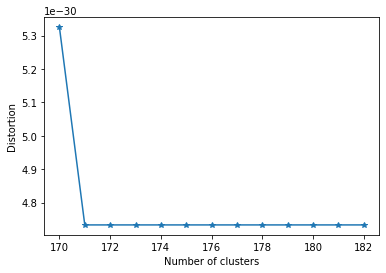

In [16]:
import warnings
warnings.filterwarnings('ignore')

distortions = []
x_train = tmp_df[['Event1','Domain']]

for i in range(170, 183):
    kmeans = KMeans(
    n_clusters=i, tol=1e-04, random_state=0)
    kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(170, 183), distortions, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [15]:
words2num_flag = 0
for x in event_list:
    t = event_splitter(x)
    DE, EE= dom_eve_extractor(t)
    traineventone(tmp_df,printscoreone)
    traineventtwo(tmp_df,printscoretwo)

Domain: C
Event: Fests


c:\users\family kadam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (144) found smaller than n_clusters (172). Possibly due to duplicate points in X.
  import sys


Model accuracy score: 0.0
[119]
Laura Wood


c:\users\family kadam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (131) found smaller than n_clusters (172). Possibly due to duplicate points in X.
  import sys


Model accuracy score: 0.00546448087431694
[55]
Andrea Thompson
Domain: Java
Event: Jobs


c:\users\family kadam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (144) found smaller than n_clusters (172). Possibly due to duplicate points in X.
  import sys


Model accuracy score: 0.0
[128]
Mark Rogers
Model accuracy score: 0.00546448087431694
[78]
Glenn Martinez


c:\users\family kadam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (131) found smaller than n_clusters (172). Possibly due to duplicate points in X.
  import sys
